<h2> Examen de Simulacion </h2>
Nombre: Esteban David Rosero Perez

# Proyecto TWEETS

# Objetivos
Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:<br>
Obtener datos de tendencia de twitter o facebook(crawler o webscraping), para ello se puede obtener a través del API [4].<br>

Se debe establecer un modelo basado en modelos matemáticos para la predicción del numero de veces que se compartirá o la tendencia del presidente basada en redes sociales.


# Introduccion
En el siguiente proyecto nosotros hacemos dos tipos de prediccion:<br>
•	Primera Prediccion: Procederemos ha realizar la prediccion tomando en cuenta el analisis de sentimientos por cada tweet en el que se involucro a Guillermo Lasso, y como parametro de salida tendremos la cantidad de retweets que nos entregara dependiendo el valor de su analisis de sentimientos.<br>
•	Segunda Prediccion: Procederemos a realizar la prediccion tomando en cuenta la cantidad de palabras que tiene el tweet en el que se involucro a Guillermo Lasso, Tambien como salida tendremos la cantidad de retweets que tendra el tweet.

# Obtencion de la data 

Primero Procedemos a realizar la instalacion de las dos librerias que vamos a utilizar primero es twint, esta nos permite sacar la informacion desde twitter haciendo una busqueda del parametro que necesitamos en este caso vamos a buscar todo lo que tenga que ver con Guillermo Lasso desde el inicio de este año, en la segunda instalacion nosotros vamos a realizar el analisis de sentimientos de los tweets que realizo Guillermo Lasso, para ello procedemos a instalar sentiment_analysis_spanish para asi poder realizar el analisis de sentimientos

In [15]:
pip install twint
pip install sentiment_analysis_spanish

Note: you may need to restart the kernel to use updated packages.


En esta parte de aqui procedemos a extraer la informacion de los tweets como parametro de busqueda colocamos Guillermo Lasso, colocamos desde cuando queremos la busqueda en nuestro caso desde el primer dia de este año y customizamos para que la busqueda nos entregue un csv.

In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()

# Configure
c = twint.Config()
c.Search = "Guillermo Lasso"
c.Since = '2020-01-01'
c.Store_csv = True
c.Custom_csv = ["username", "comment", "reply", "retweet", "like"]
c.Output = ("./data_cruda.csv")
twint.run.Search(c)

# Importamos las Librerias

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtenemos la Informacion

In [11]:
df = pd.read_csv('./data_cruda.csv')
df

,username,comment,reply,retweet,like
0,Presidencia ECU,"El presidente \n@LassoGuillermo\n, durante su ...",166,556,4.5K
1,Guillermo Lasso,Hoy tuve la oportunidad de dialogar con \n@leo...,581,874,4.2K
2,Guillermo Lasso,Fue un honor recibir a representantes de \n@US...,207,638,2.8K
3,Guillermo Lasso,Esta noche mantuvimos la primera reunión del C...,368,1.1K,5.8K
4,Guillermo Lasso,El Decreto que elimina los registros de crédit...,256,875,3.5K
...,...,...,...,...,...
245,Guillermo Lasso,En 6 días tenemos una responsabilidad históric...,138,574,2.1K
246,Guillermo Lasso,Las 4 claves de mi Plan de Gobierno: fortalece...,134,464,1.2K
247,Guillermo Lasso,"Desde la Presidencia, trabajaremos con todas l...",70,184,757
248,Guillermo Lasso,El primer deber del Estado es proteger la vida...,63,205,601


# limpiamos los datos
Los valores que extraimos tiene datos que no nos ayuda para la elaboracion del analisis para posteriormente realizar la prediccion, entonces procedemos a limpiar los campos de reply, retweet, like y tambien los commentarios ya que vienen valores basura.

In [12]:
pay = df.retweet.str.replace(r'K','00')
pay = pay.str.replace(r'.','')
df.retweet = pay.apply(lambda x: (int(x)))
pay = df.like.str.replace(r'K','00')
pay = pay.str.replace(r'.','')
df.like = pay.apply(lambda x: (int(x)))
df.comment = df.comment.str.replace(r'\n','')
df              

,username,comment,reply,retweet,like
0,Presidencia ECU,"El presidente @LassoGuillermo, durante su prim...",166,556,4500
1,Guillermo Lasso,Hoy tuve la oportunidad de dialogar con @leopo...,581,874,4200
2,Guillermo Lasso,Fue un honor recibir a representantes de @USem...,207,638,2800
3,Guillermo Lasso,Esta noche mantuvimos la primera reunión del C...,368,1100,5800
4,Guillermo Lasso,El Decreto que elimina los registros de crédit...,256,875,3500
...,...,...,...,...,...
245,Guillermo Lasso,En 6 días tenemos una responsabilidad históric...,138,574,2100
246,Guillermo Lasso,Las 4 claves de mi Plan de Gobierno: fortalece...,134,464,1200
247,Guillermo Lasso,"Desde la Presidencia, trabajaremos con todas l...",70,184,757
248,Guillermo Lasso,El primer deber del Estado es proteger la vida...,63,205,601


Quitamos los valores nulos y verificamos que ya no existan esos valores

In [13]:
df = df.dropna(how='any')
df.isnull().sum()

username    0
comment     0
reply       0
retweet     0
like        0
dtype: int64

# Primera Prediccion

En la primera prediccion nosotros vamos a crear una funcion para analizar los sentimientos de cada tweet por lo que procedemos a crear la funcion SentimientosPro con la libreria que habiamos instalado llamada sentiment_analisys_spanish

In [16]:
from sentiment_analysis_spanish import sentiment_analysis
def sentimientosPro(texto):
    sentiment = sentiment_analysis.SentimentAnalysisSpanish()
    return(sentiment.sentiment(texto))

In [17]:
sentimientosPro('El presidente @LassoGuillermo, durante su primer día de actividades como Jefe de Estado, dedicó un momento para saludar, desde el balcón presidencial, a los ciudadanos ubicados en la Plaza de la Independencia. #GobiernoDelEncuentro')

0.9998495904271076

Como podemos observar nos da un valor de 0.999 cuando tiende a ser la probabilidad muy baja, es por que el texto tiende a ser negativo y cuando se acerca a 1, como podemos ver en los datos siguientes ya tenemos un campo que da el analisis de sentimientos del texto

In [18]:
df=df.assign(Sentimiento=6)
df.Sentimiento = df.comment.apply(lambda x: (sentimientosPro(x)))
df

,username,comment,reply,retweet,like,Sentimiento
0,Presidencia ECU,"El presidente @LassoGuillermo, durante su prim...",166,556,4500,0.999850
1,Guillermo Lasso,Hoy tuve la oportunidad de dialogar con @leopo...,581,874,4200,0.003335
2,Guillermo Lasso,Fue un honor recibir a representantes de @USem...,207,638,2800,0.005506
3,Guillermo Lasso,Esta noche mantuvimos la primera reunión del C...,368,1100,5800,0.000015
4,Guillermo Lasso,El Decreto que elimina los registros de crédit...,256,875,3500,0.000005
...,...,...,...,...,...,...
245,Guillermo Lasso,En 6 días tenemos una responsabilidad históric...,138,574,2100,0.006963
246,Guillermo Lasso,Las 4 claves de mi Plan de Gobierno: fortalece...,134,464,1200,0.019689
247,Guillermo Lasso,"Desde la Presidencia, trabajaremos con todas l...",70,184,757,0.995827
248,Guillermo Lasso,El primer deber del Estado es proteger la vida...,63,205,601,0.000459


Procedemos a guardar ya que el proceso de generacion del analisis de sentimiento es un poco demorado.

In [21]:
df.to_csv('example.csv')

In [26]:
df = pd.read_csv('./example.csv')
df

,Unnamed: 0,username,comment,reply,retweet,like,Sentimiento
0,0,Presidencia ECU,"El presidente @LassoGuillermo, durante su prim...",166,556,4500,0.999850
1,1,Guillermo Lasso,Hoy tuve la oportunidad de dialogar con @leopo...,581,874,4200,0.003335
2,2,Guillermo Lasso,Fue un honor recibir a representantes de @USem...,207,638,2800,0.005506
3,3,Guillermo Lasso,Esta noche mantuvimos la primera reunión del C...,368,1100,5800,0.000015
4,4,Guillermo Lasso,El Decreto que elimina los registros de crédit...,256,875,3500,0.000005
...,...,...,...,...,...,...,...
243,245,Guillermo Lasso,En 6 días tenemos una responsabilidad históric...,138,574,2100,0.006963
244,246,Guillermo Lasso,Las 4 claves de mi Plan de Gobierno: fortalece...,134,464,1200,0.019689
245,247,Guillermo Lasso,"Desde la Presidencia, trabajaremos con todas l...",70,184,757,0.995827
246,248,Guillermo Lasso,El primer deber del Estado es proteger la vida...,63,205,601,0.000459


# Prediccion
Obtenemos la variable de entrada que es la columna de sentimientos y la variable de salida que es la columna de retweets

In [34]:
x = df.iloc[:,6:7].values
y = df.iloc[:,4:5].values

Creamos el modelo de prediccion random forest 

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

modeloRF = RandomForestRegressor(n_estimators=10, random_state=0)
modeloRF.fit(X_train, y_train.ravel())

y_pred3 = modeloRF.predict(X_test)
df3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred3.flatten()}) 
df3=df3.round(decimals=5)
df3.head()

,Actual,Predicted
0,252,166.50
1,128,481.60
2,429,288.50
3,296,371.31
4,111,524.20


In [36]:
preRF=r2_score(y_test,y_pred3)
print("Precisión del modelo: ", preRF)

Precisión del modelo:  -2.4887954605839266


# Grafica de la prediccion

Text(0, 0.5, 'Y test Value')

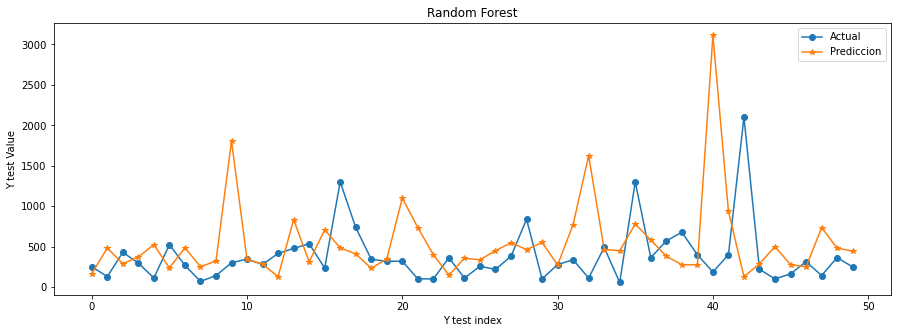

In [39]:
plt.figure(figsize = (15,5))
plt.plot(df3.index, df3.Actual,'o-')
plt.plot(df3.index, df3.Predicted,'*-')
plt.legend(['Actual', 'Prediccion'])
plt.title('Random Forest')
plt.xlabel('Y test index')
plt.ylabel('Y test Value')

# Segunda Prediccion

Procederemos a realizar la prediccion tomando en cuenta la cantidad de palabras que tiene el tweet en el que se involucro a Guillermo Lasso, Tambien como salida tendremos la cantidad de retweets que tendra el tweet.

# Obtenemos la Informacion

In [42]:
df = pd.read_csv('./data_cruda.csv')
df

,username,comment,reply,retweet,like
0,Presidencia ECU,"El presidente \n@LassoGuillermo\n, durante su ...",166,556,4.5K
1,Guillermo Lasso,Hoy tuve la oportunidad de dialogar con \n@leo...,581,874,4.2K
2,Guillermo Lasso,Fue un honor recibir a representantes de \n@US...,207,638,2.8K
3,Guillermo Lasso,Esta noche mantuvimos la primera reunión del C...,368,1.1K,5.8K
4,Guillermo Lasso,El Decreto que elimina los registros de crédit...,256,875,3.5K
...,...,...,...,...,...
245,Guillermo Lasso,En 6 días tenemos una responsabilidad históric...,138,574,2.1K
246,Guillermo Lasso,Las 4 claves de mi Plan de Gobierno: fortalece...,134,464,1.2K
247,Guillermo Lasso,"Desde la Presidencia, trabajaremos con todas l...",70,184,757
248,Guillermo Lasso,El primer deber del Estado es proteger la vida...,63,205,601


# limpiamos los datos
Los valores que extraimos tiene datos que no nos ayuda para la elaboracion del analisis para posteriormente realizar la prediccion, entonces procedemos a limpiar los campos de reply, retweet, like y tambien los commentarios ya que vienen valores basura.

In [44]:
pay = df.retweet.str.replace(r'K','00')
pay = pay.str.replace(r'.','')
df.retweet = pay.apply(lambda x: (int(x)))
pay = df.like.str.replace(r'K','00')
pay = pay.str.replace(r'.','')
df.like = pay.apply(lambda x: (int(x)))
df.comment = df.comment.str.replace(r'\n','')
df      

,username,comment,reply,retweet,like,countWords,countHashtags
0,Presidencia ECU,"El presidente @LassoGuillermo, durante su prim...",166,556,4500,33,1
1,Guillermo Lasso,Hoy tuve la oportunidad de dialogar con @leopo...,581,874,4200,33,2
2,Guillermo Lasso,Fue un honor recibir a representantes de @USem...,207,638,2800,36,2
3,Guillermo Lasso,Esta noche mantuvimos la primera reunión del C...,368,1100,5800,40,1
4,Guillermo Lasso,El Decreto que elimina los registros de crédit...,256,875,3500,32,2
...,...,...,...,...,...,...,...
245,Guillermo Lasso,En 6 días tenemos una responsabilidad históric...,138,574,2100,19,2
246,Guillermo Lasso,Las 4 claves de mi Plan de Gobierno: fortalece...,134,464,1200,31,2
247,Guillermo Lasso,"Desde la Presidencia, trabajaremos con todas l...",70,184,757,27,1
248,Guillermo Lasso,El primer deber del Estado es proteger la vida...,63,205,601,26,2


# Procesamiento de los datos
Se procede a generar la cantidad de palabras que tiene el tweet, como tambien la cantidad de menciones que se agregan en el tweet, para obtener nuestra variable de entrada para el modelo de prediccion

In [45]:
df=df.assign(countWords=6)
df=df.assign(countHashtags=6)
df.countWords = df.comment.apply(lambda x: len(str(x).split(" ")))
df.countHashtags = df.comment.apply(lambda x: (str(x).count("#")))
df

,username,comment,reply,retweet,like,countWords,countHashtags
0,Presidencia ECU,"El presidente @LassoGuillermo, durante su prim...",166,556,4500,33,1
1,Guillermo Lasso,Hoy tuve la oportunidad de dialogar con @leopo...,581,874,4200,33,2
2,Guillermo Lasso,Fue un honor recibir a representantes de @USem...,207,638,2800,36,2
3,Guillermo Lasso,Esta noche mantuvimos la primera reunión del C...,368,1100,5800,40,1
4,Guillermo Lasso,El Decreto que elimina los registros de crédit...,256,875,3500,32,2
...,...,...,...,...,...,...,...
245,Guillermo Lasso,En 6 días tenemos una responsabilidad históric...,138,574,2100,19,2
246,Guillermo Lasso,Las 4 claves de mi Plan de Gobierno: fortalece...,134,464,1200,31,2
247,Guillermo Lasso,"Desde la Presidencia, trabajaremos con todas l...",70,184,757,27,1
248,Guillermo Lasso,El primer deber del Estado es proteger la vida...,63,205,601,26,2


Aqui se puede observar las graficas que se genera con relacion a cada Tweet.

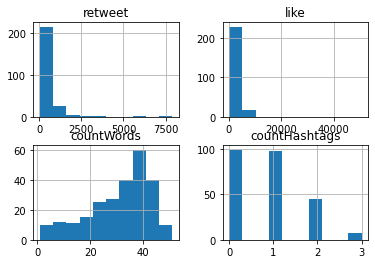

In [46]:
df.drop(['username'],1).hist()
plt.show()

# Prediccion
Obtenemos la variable de entrada que es la columna de cantidad de palabras(CountWords) y la variable de salida que es la columna de retweets

In [47]:
y = df.iloc[:,3:4].values
x = df.iloc[:,5:6].values

Creamos el modelo de prediccion random forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

modeloRF = RandomForestRegressor(n_estimators=10, random_state=0)
modeloRF.fit(X_train, y_train.ravel())

y_pred3 = modeloRF.predict(X_test)
df3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred3.flatten()}) 
df3=df3.round(decimals=5)
df3.head()

,Actual,Predicted
0,154,274.55357
1,219,418.21333
2,318,381.81985
3,218,543.78667
4,632,570.20150


In [50]:
preRF=r2_score(y_test,y_pred3)
print("Precisión del modelo: ", preRF)

Precisión del modelo:  -0.3011961660574518


# Grafica de la prediccion

Text(0, 0.5, 'Y test Value')

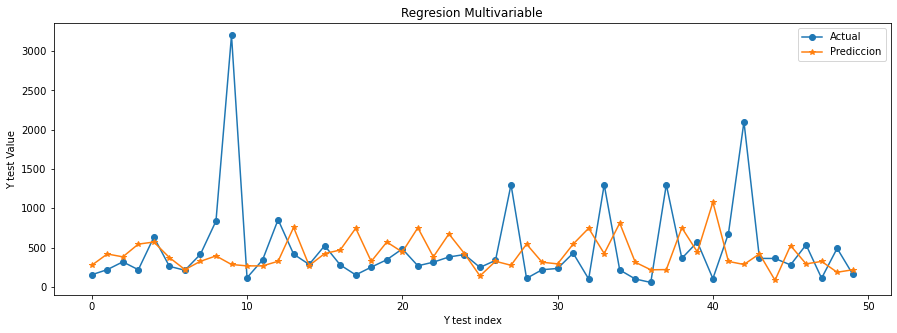

In [51]:
plt.figure(figsize = (15,5))
plt.plot(df3.index, df3.Actual,'o-')
plt.plot(df3.index, df3.Predicted,'*-')
plt.legend(['Actual', 'Prediccion'])
plt.title('Regresion Multivariable')
plt.xlabel('Y test index')
plt.ylabel('Y test Value')

# Conclusion
Como se puede observar segun las graficas, los dos modelos de prediccion nos ayuda a relacionar la cantidad de retweets con la variable de entrada que se le involucra dependiendo la prediccion, en el primer caso fue el analisis de sentimientos que nos dio muy buenos resultados y podemos enteder que segun el analisis que obtuvo el tweet, su relacion a la cantidad de retweets que va a obtener el mismo se vera afectado, por el otro caso podemos tambien observar que la cantidad de palabras influye en la cantidad de retweets que va a obtener el tweet, por lo que segun los datos, el analisis de sentimientos nos da un mejor resultado ya que esta analiza el tweet segun su contenido.